# **Importing Packages**

Make sure to install the packages before importing if needed.

In [3]:
import scanpy as sc
import anndata as ad
import numpy as np
import igraph
import leidenalg

# **Loading Data**

https://github.com/chanzuckerberg/single-cell-curation/blob/main/schema/7.0.0/schema.md 
requirements for all AnnData objects CELLxCELL

In [4]:
## Emplacement pour elodie 
# adata = sc.read_h5ad("/Users/elodiehusson/Desktop/AD & PD/AD_PD_CTRL.h5ad")

## Path Yara 
adata = sc.read_h5ad("C:/Users/yarad/Desktop/x/Masters/Master BMC - Sorbonne/M2/Single Cell/Project/Coding Project/21000_AD_PD_CTRL.h5ad/21000_AD_PD_CTRL.h5ad")

# ajoutez vos emplacements ici du fichier, et juste mettez en commentaires les autres
# adata = sc.read_h5ad(".../.../subset_AD_PD_CTRL.h5ad")

In [5]:
adata.obs.groupby(["disease", "AD_status", "Parkinson_disease"]).size()

C:\Users\yarad\AppData\Local\Temp\ipykernel_9236\2862628901.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby(["disease", "AD_status", "Parkinson_disease"]).size()


disease                        AD_status      Parkinson_disease
dementia || Alzheimer disease  No             No                      0
                                              Yes                     0
                               Not Evaluated  No                      0
                                              Yes                     0
                               Yes            No                   7000
                                              Yes                     0
dementia || Parkinson disease  No             No                      0
                                              Yes                  7000
                               Not Evaluated  No                      0
                                              Yes                     0
                               Yes            No                      0
                                              Yes                     0
normal                         No             No                   5999


## **Reduced Dataset's Metadata**

scanpy shows a structured summary:

In [6]:
adata

AnnData object with n_obs × n_vars = 21000 × 34176
    obs: 'Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'is_primary_data', 'AD_status', 'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status', 'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder', 'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry', 'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_name', 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'sche

In [7]:
# This is the sparse matrix
print("adata.X type is :",type(adata.X))

adata.X[:5, :5]

adata.X type is : <class 'scipy.sparse._csr.csr_matrix'>


<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 3 stored elements and shape (5, 5)>

In [8]:
print(f"The variable adata has the following shape: {adata.shape}.")
print(f"There are {adata.shape[0]} cells and {adata.shape[1]} genes in this dataset.")

The variable adata has the following shape: (21000, 34176).
There are 21000 cells and 34176 genes in this dataset.


In [9]:
adata.obs.shape
import pandas as pd
x=pd.crosstab(adata.obs["donor_id"],adata.obs["disease"])
x

disease     dementia || Alzheimer disease  dementia || Parkinson disease  \
donor_id                                                                   
Donor_8                                 0                              0   
Donor_22                              101                              0   
Donor_31                              147                              0   
Donor_43                                7                              0   
Donor_45                               33                              0   
...                                   ...                            ...   
Donor_1354                              0                              0   
Donor_1386                            160                              0   
Donor_1404                              0                              0   
Donor_1451                              0                              0   
Donor_1467                              0                            737   

disease     normal  
donor_id            
Donor_8         25  
Donor_22         0  
Donor_31         0  
Donor_43         0  
Donor_45         0  
...            ...  
Donor_1354     228  
Donor_1386       0  
Donor_1404     231  
Donor_1451     227  
Donor_1467       0  

[70 rows x 3 columns]

In [10]:
print("The keys of adata.obs are the following:", adata.obs.keys())

adata.obs.head()

The keys of adata.obs are the following: Index(['Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype',
       'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id',
       'development_stage_ontology_term_id', 'sex_ontology_term_id',
       'donor_id', 'suspension_type', 'is_primary_data', 'AD_status',
       'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status',
       'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder',
       'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry',
       'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex',
       'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid'],
      dtype='object')


Source  n_genes  n_counts   class  \
barcodekey                                                         
Donor_198-1-CATACCCAGTAGTCTC-0      R     1706    2920.0   Astro   
Donor_31-1-TATCTGTTCTTAGCTT-0       R     2375    4183.0  Immune   
Donor_124-1-AAGTGAAGTCAGCTTA-0      R     7384   29642.0      EN   
Donor_730-2-CCACACTTCACTTCTA-1      R     4354    9341.0      EN   
Donor_310-2-TACGGTAGTGACTCGC-1      R     2202    3998.0   Oligo   

                                    subclass           subtype  \
barcodekey                                                       
Donor_198-1-CATACCCAGTAGTCTC-0         Astro        Astro_WIF1   
Donor_31-1-TATCTGTTCTTAGCTT-0          Micro             Micro   
Donor_124-1-AAGTGAAGTCAGCTTA-0  EN_L3_5_IT_3      EN_L3_5_IT_3   
Donor_730-2-CCACACTTCACTTCTA-1    EN_L2_3_IT  EN_L2_3_IT_PDGFD   
Donor_310-2-TACGGTAGTGACTCGC-1         Oligo      Oligo_OPALIN   

                               tissue_ontology_term_id tissue_type  \
barcodekey                                                           
Donor_198-1-CATACCCAGTAGTCTC-0          UBERON:0009834      tissue   
Donor_31-1-TATCTGTTCTTAGCTT-0           UBERON:0009834      tissue   
Donor_124-1-AAGTGAAGTCAGCTTA-0          UBERON:0009834      tissue   
Donor_730-2-CCACACTTCACTTCTA-1          UBERON:0009834      tissue   
Donor_310-2-TACGGTAGTGACTCGC-1          UBERON:0009834      tissue   

                               assay_ontology_term_id  \
barcodekey                                              
Donor_198-1-CATACCCAGTAGTCTC-0            EFO:0009922   
Donor_31-1-TATCTGTTCTTAGCTT-0             EFO:0009922   
Donor_124-1-AAGTGAAGTCAGCTTA-0            EFO:0009922   
Donor_730-2-CCACACTTCACTTCTA-1            EFO:0009922   
Donor_310-2-TACGGTAGTGACTCGC-1            EFO:0009922   

                               cell_type_ontology_term_id  ...  \
barcodekey                                                 ...   
Donor_198-1-CATACCCAGTAGTCTC-0                 CL:0000127  ...   
Donor_31-1-TATCTGTTCTTAGCTT-0                  CL:0000129  ...   
Donor_124-1-AAGTGAAGTCAGCTTA-0                 CL:4023040  ...   
Donor_730-2-CCACACTTCACTTCTA-1                 CL:4030059  ...   
Donor_310-2-TACGGTAGTGACTCGC-1                 CL:0000128  ...   

                               genetic_ancestry  \
barcodekey                                        
Donor_198-1-CATACCCAGTAGTCTC-0          African   
Donor_31-1-TATCTGTTCTTAGCTT-0        East Asian   
Donor_124-1-AAGTGAAGTCAGCTTA-0          African   
Donor_730-2-CCACACTTCACTTCTA-1          unknown   
Donor_310-2-TACGGTAGTGACTCGC-1          unknown   

                                      disease_ontology_term_id  \
barcodekey                                                       
Donor_198-1-CATACCCAGTAGTCTC-0  MONDO:0001627 || MONDO:0004975   
Donor_31-1-TATCTGTTCTTAGCTT-0   MONDO:0001627 || MONDO:0004975   
Donor_124-1-AAGTGAAGTCAGCTTA-0  MONDO:0001627 || MONDO:0004975   
Donor_730-2-CCACACTTCACTTCTA-1  MONDO:0001627 || MONDO:0004975   
Donor_310-2-TACGGTAGTGACTCGC-1  MONDO:0001627 || MONDO:0004975   

                                                                        cell_type  \
barcodekey                                                                          
Donor_198-1-CATACCCAGTAGTCTC-0                                          astrocyte   
Donor_31-1-TATCTGTTCTTAGCTT-0                                     microglial cell   
Donor_124-1-AAGTGAAGTCAGCTTA-0  L2/3-6 intratelencephalic projecting glutamate...   
Donor_730-2-CCACACTTCACTTCTA-1  L2/3 intratelencephalic projecting glutamaterg...   
Donor_310-2-TACGGTAGTGACTCGC-1                                    oligodendrocyte   

                                    assay                        disease  \
barcodekey                                                                 
Donor_198-1-CATACCCAGTAGTCTC-0  10x 3' v3  dementia || Alzheimer disease   
Donor_31-1-TATCTGTTCTTAGCTT-0   10x 3' v3  dementia || Alzheimer disease   
Donor_124-1-AAGT

In [11]:
print("Donor Names : \n", adata.obs_names)

print("Gene Names : \n", adata.var_names)

Donor Names : 
 Index(['Donor_198-1-CATACCCAGTAGTCTC-0', 'Donor_31-1-TATCTGTTCTTAGCTT-0',
       'Donor_124-1-AAGTGAAGTCAGCTTA-0', 'Donor_730-2-CCACACTTCACTTCTA-1',
       'Donor_310-2-TACGGTAGTGACTCGC-1', 'Donor_1347-2-GTACAGTCAGACAATA-1',
       'Donor_1347-1-CAAGCTATCTAGCATG-0', 'Donor_604-2-CTAAGTGCATAGGAGC-1',
       'Donor_604-1-TATCGCCCAATCTCGA-0', 'Donor_1040-1-ATAGAGAGTCTCTCAC-0',
       ...
       'Donor_1003-1-ATTACCTCATCGCTCT-1', 'Donor_745-2-CACGAATAGCCATGCC-1',
       'Donor_1214-1-AGAAATGGTGTATACC-0', 'Donor_634-2-CTAACTTGTGGTGATG-0',
       'Donor_135-2-TGACGCGTCTTGGATG-0', 'Donor_745-2-GTCTTTACAATACCTG-1',
       'Donor_135-2-ATTCCATCAAAGGCTG-0', 'Donor_1254-2-TTCACCGGTCAGTCTA-0',
       'Donor_1214-2-TCAATCTTCACTTCTA-1', 'Donor_794-1-AGAGAATCAAGAAACT-0'],
      dtype='object', name='barcodekey', length=21000)
Gene Names : 
 Index(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG000000

In [12]:
disease_list = list(adata.obs["disease"].cat.categories)

print("The types of disease in this dataset are :", disease_list)

The types of disease in this dataset are : ['dementia || Alzheimer disease', 'dementia || Parkinson disease', 'normal']


The number of cells per disease type in this dataset:

In [13]:
for disease_type in disease_list : 

    print(len(adata.obs["disease"][adata.obs["disease"]==disease_type]), " cells :", disease_type)

7000  cells : dementia || Alzheimer disease
7000  cells : dementia || Parkinson disease
7000  cells : normal


In [14]:
# métadonnées gènes 
print("adata.var.keys :", adata.var.keys())

adata.var.head(2)

adata.var.keys : Index(['gene_name', 'n_cells', 'feature_is_filtered', 'feature_name',
       'feature_reference', 'feature_biotype', 'feature_length',
       'feature_type'],
      dtype='object')


gene_name  n_cells  feature_is_filtered feature_name  \
ENSG00000000003    TSPAN6   256237                False       TSPAN6   
ENSG00000000005      TNMD    21369                False         TNMD   

                feature_reference feature_biotype feature_length  \
ENSG00000000003    NCBITaxon:9606            gene           2396   
ENSG00000000005    NCBITaxon:9606            gene            873   

                   feature_type  
ENSG00000000003  protein_coding  
ENSG00000000005  protein_coding

#### **Embeddings**
To compare with our results

In [15]:
# Embeddings (UMAP, PCA...)
print("adata.obsm.keys :", adata.obsm.keys())

# Other information
print("adata.uns.keys :", adata.uns.keys())

adata.obsm.keys : KeysView(AxisArrays with keys: X_umap)
adata.uns.keys : dict_keys(['batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'subclass_colors', 'subtype_colors', 'title', 'uid'])


In [16]:
adata.obs.keys()

Index(['Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype',
       'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id',
       'development_stage_ontology_term_id', 'sex_ontology_term_id',
       'donor_id', 'suspension_type', 'is_primary_data', 'AD_status',
       'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status',
       'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder',
       'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry',
       'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex',
       'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid'],
      dtype='object')

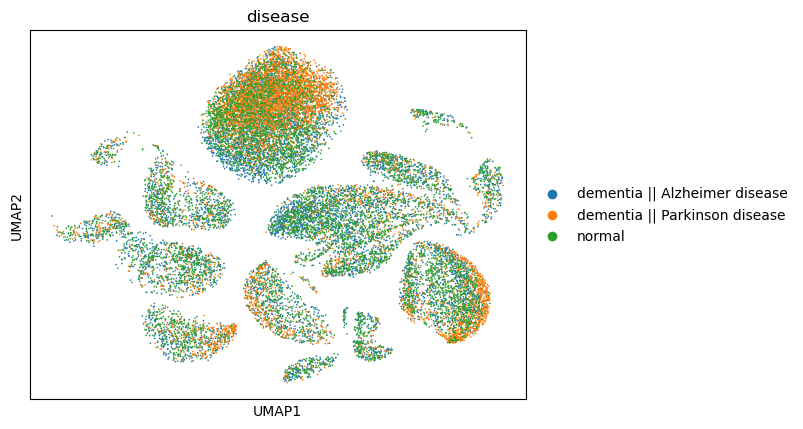

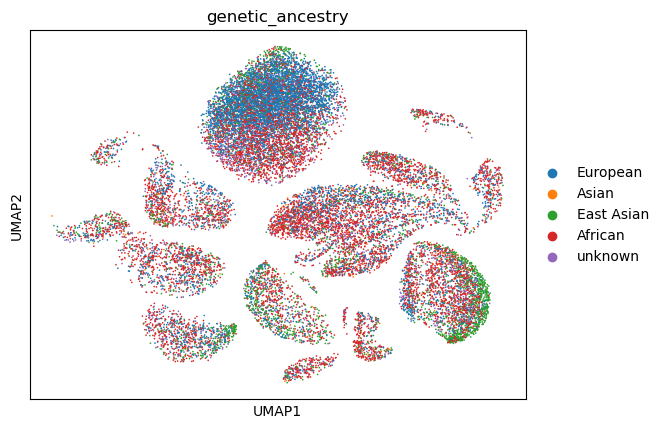

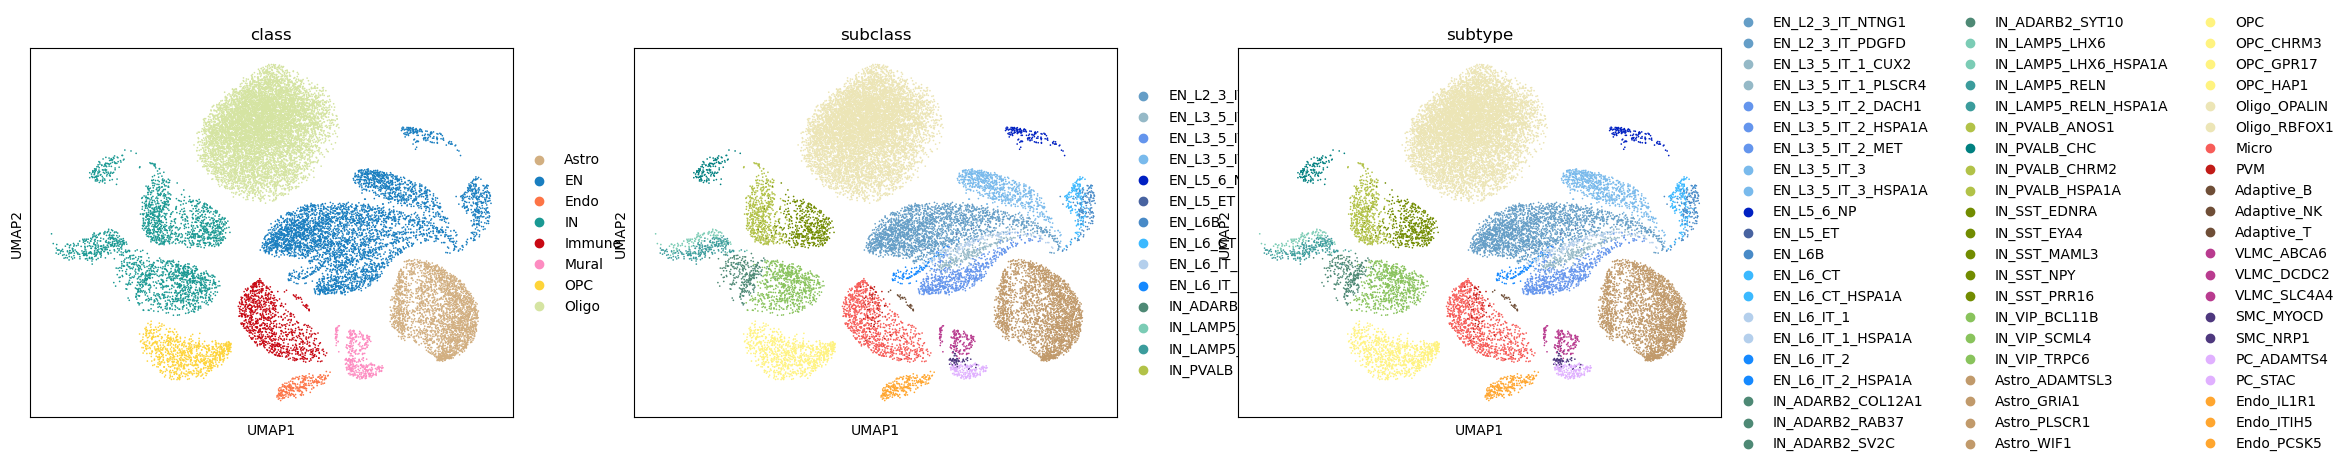

In [17]:
# sc.pl.umap(adata, color='cell_type')
sc.pl.umap(adata, color='disease')
sc.pl.umap(adata, color='genetic_ancestry')

# sc.pl.umap(adata, color='AD_status')
# sc.pl.umap(adata, color='sex')
# sc.pl.umap(adata, color='subclass')
# sc.pl.umap(adata, color=['cell_type', 'subclass'])
sc.pl.umap(adata, color = ['class', 'subclass', 'subtype'])

# **RNAseq pipeline**

## 1. Quality Check

### a - Visualization of QC metrics

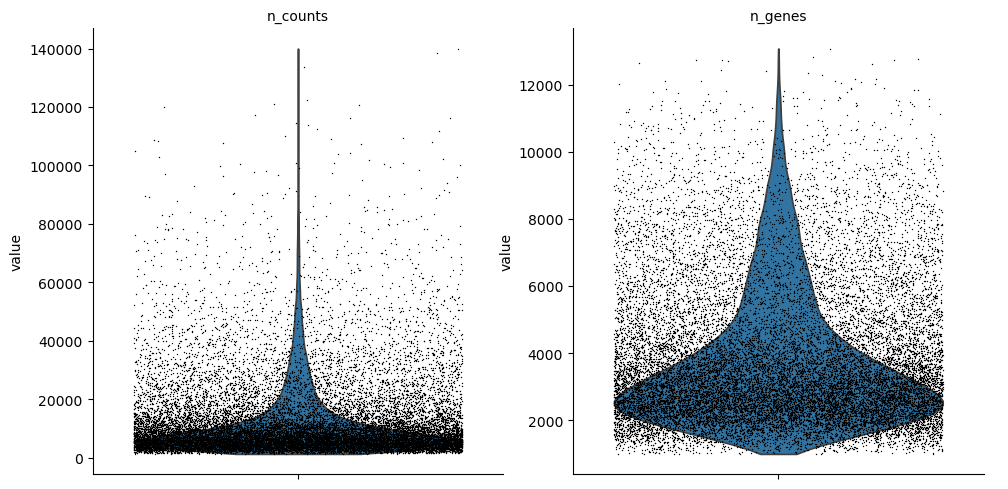

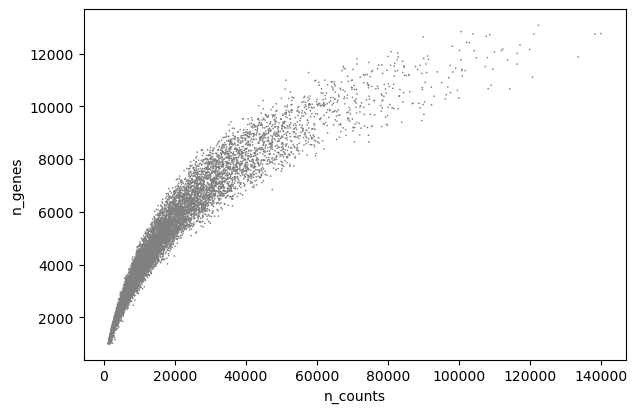

In [18]:
# 1. Calculation of QC metrics and addition to adata.obs
sc.pp.calculate_qc_metrics(adata, inplace = True)

# 2. Visualization of QC metrics before filtering
sc.pl.violin(
    adata, 
    ['n_counts', 'n_genes'], # violin plot of number of genes and counts per cell
    jitter = 0.4,
    multi_panel = True
)

sc.pl.scatter(adata, x='n_counts', y='n_genes') # Scatter plot of number of genes vs number of counts

### b - Filtering out low quality cells

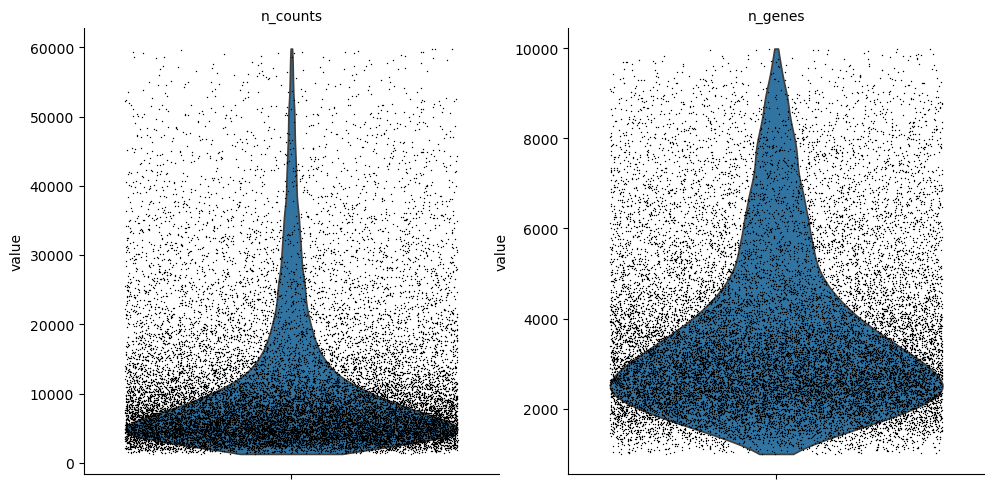

In [19]:
# 3. Application of filters
adata = adata[adata.obs['n_genes'] < 10000, :] # cutoff chosen: 9 000 genes

adata = adata[adata.obs['n_counts'] < 60000, :] # cutoff chosen: 40 000 counts

# 4. Visualization of QC metrics after filtering
sc.pl.violin(
    adata, 
    ['n_counts', 'n_genes'], # violin plot of number of genes and counts per cell
    jitter = 0.4,
    multi_panel = True
)



### c - Filtering out mitochondrial genes

In [20]:
# Counting the number of mitochondrial genes
adata.var["mt"] = adata.var['gene_name'].str.startswith("MT-")

# Calculating QC metrics including the percentage of mitochondrial genes and adding them to adata.obs
sc.pp.calculate_qc_metrics(
    adata,
    qc_vars = ["mt"],
    inplace = True,
    log1p=True
)

C:\Users\yarad\AppData\Local\Temp\ipykernel_9236\3540220753.py:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["mt"] = adata.var['gene_name'].str.startswith("MT-")


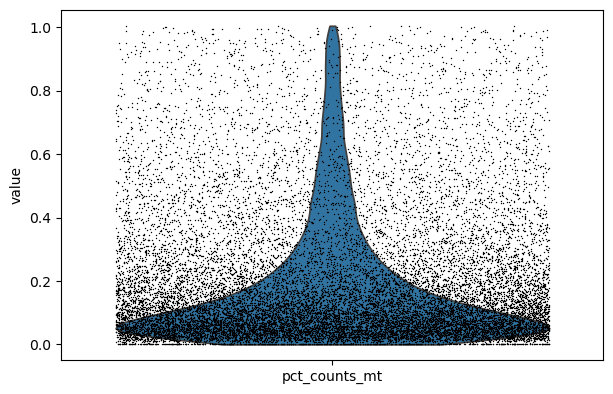

In [21]:
sc.pl.violin(
    adata,
    keys='pct_counts_mt',
    jitter=0.4,
    rotation=0,   
    stripplot=True,
    show=True
)

# data was already filtered on pct_counts_mt 
# it's weird because even before the filtering there was no cell with >10%. 
# They must have been filtered before
# I still keep the line just in case
adata_hvgadata = adata[adata.obs['pct_counts_mt'] < 10, :]


### d - Excluding ribosomal and hemoglobin genes

In [ ]:
# Ribosomal genes
adata.var["ribo"] = adata.var['gene_name'].str.startswith(("RPS", "RPL"))
print("proportion of ribo genes in all expressed genes : ", adata.var["ribo"].sum()/len(adata.var)*100)

# Hemoglobin genes
adata.var["hb"] = adata.var['gene_name'].str.contains("^HB[^(P)]")
print("Number of hemo genes before deletion : ", adata.var["hb"].sum())

#C onfirming that hb genes were properly removed
genes_to_keep = ~adata.var["hb"]
adata = adata[:, genes_to_keep].copy()
print("Number of hemo genes after deletion: ", adata.var["hb"].sum())

# sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True)

proportion of ribo genes in all expressed genes :  1.5127574906367043
Number of hemo genes before deletion :  9
Number of hemo genes after deletion:  0


## 2. Normalization

this part was already performed, so we are not doing it again (How did they normalize?)

## 3. Highly Variable Genes (HVGs)

we kept 3000 highly variable genes out of 34167 genes


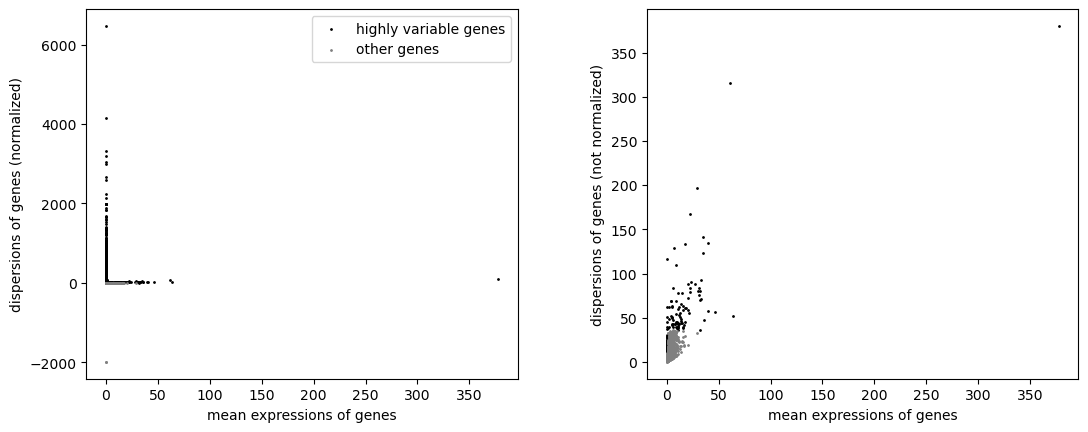

In [23]:
nHVG = 3000 

sc.pp.highly_variable_genes(
    adata, 
    flavor='cell_ranger',
    n_top_genes=nHVG
)

print("we kept", nHVG, "highly variable genes out of", adata.shape[1], "genes")
sc.pl.highly_variable_genes(adata)

alternative aux HVG : prendre les 3000 gènes les + exprimés

In [24]:
adata.var['highly_variable'].value_counts()

highly_variable
False    31167
True      3000
Name: count, dtype: int64

new AnnData object with the HVG only

In [25]:
adata_hvg = adata[:, adata.var['highly_variable']].copy()

## 4. Scaling & PCA

In [26]:
# Scaling 
sc.pp.scale(adata_hvg, max_value = 10)


c:\Users\yarad\AppData\Local\spyder-6\envs\spyder-runtime\Lib\functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


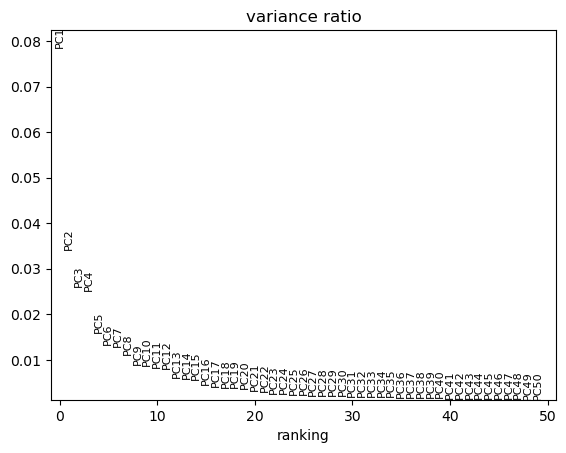

In [27]:
# PCA
sc.tl.pca(adata_hvg)

sc.pl.pca_variance_ratio(adata_hvg, n_pcs = 50) # elbow plot to see how many PCs to keep

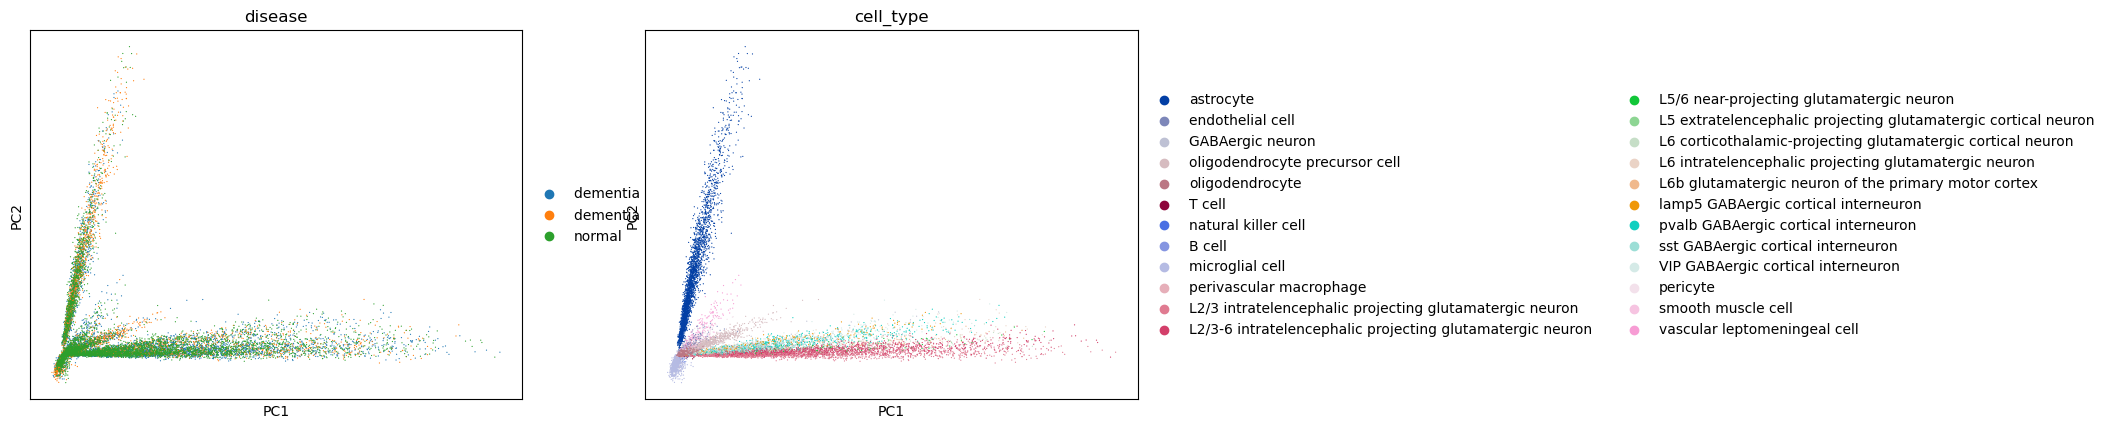

In [28]:
sc.pl.pca(
    adata_hvg,
    color = ["disease", "cell_type"],
    ncols = 3,
    size = 3,
)

## Batch effect correction??

In [29]:
import bbknn
bbknn.bbknn(adata_hvg, batch_key='donor_id')

ModuleNotFoundError: No module named 'bbknn'

## 5. Clustering

### Neighbors

In [30]:
# number of neighbors
# we chose 30 PCs because after that the variance ratio doesn't decrease that much
nPC = 30

sc.pp.neighbors(adata_hvg, n_pcs = nPC)

c:\Users\yarad\AppData\Local\spyder-6\envs\spyder-runtime\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Clustering

In [31]:
import igraph
import leidenalg

sc.tl.leiden(adata_hvg, resolution = 0.0007)

print("Number of clusters :", len(adata_hvg.obs['leiden'].cat.categories))

C:\Users\yarad\AppData\Local\Temp\ipykernel_9236\830700533.py:4: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_hvg, resolution = 0.0007)


Number of clusters : 4


### UMAP

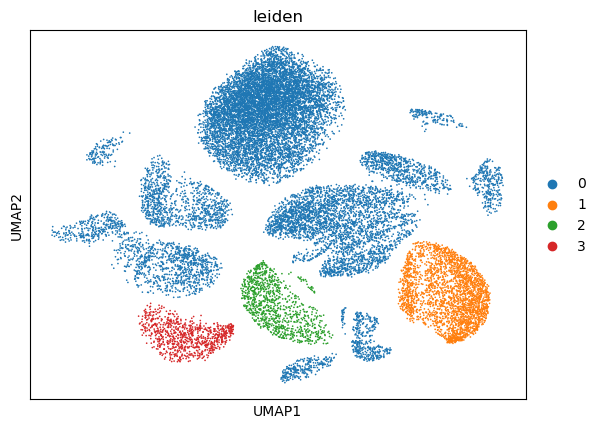

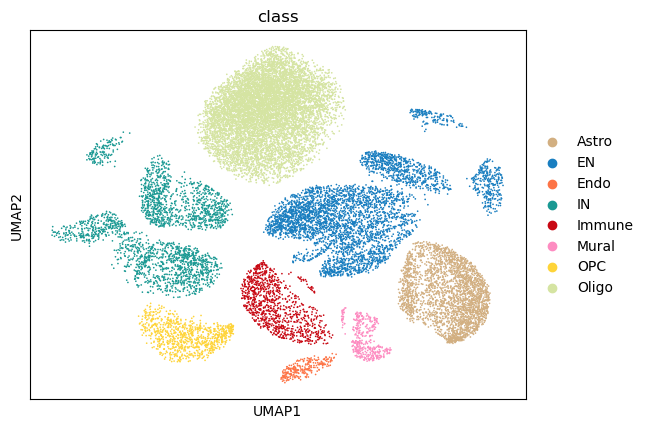

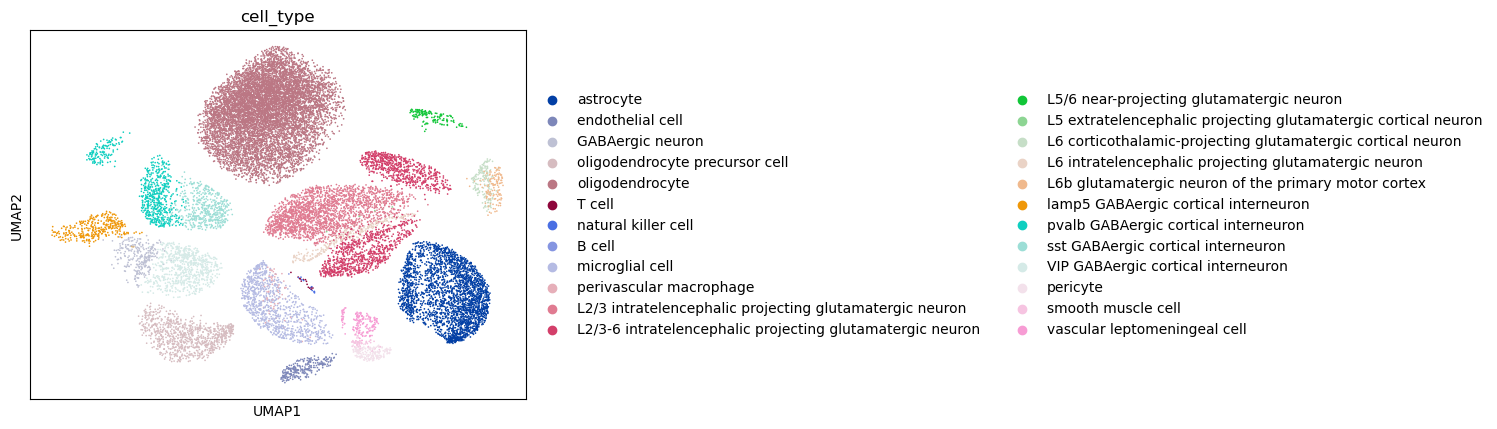

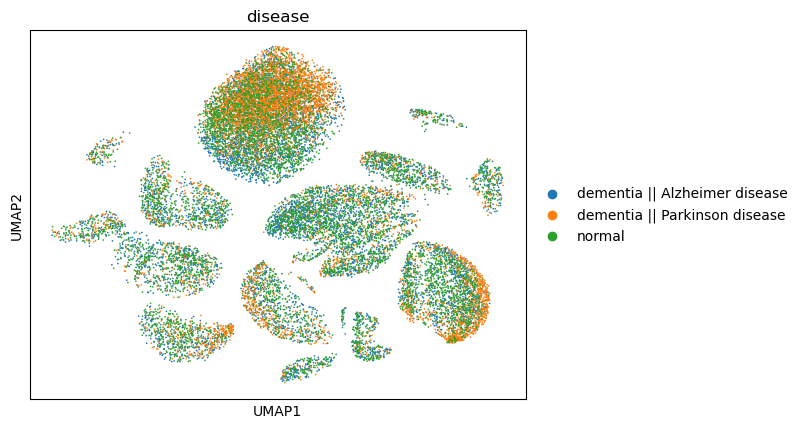

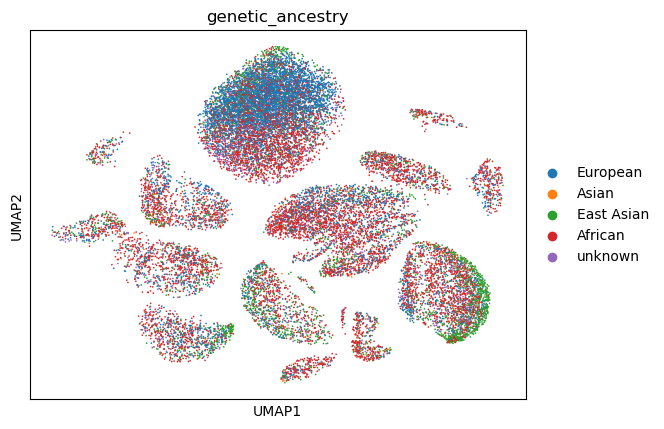

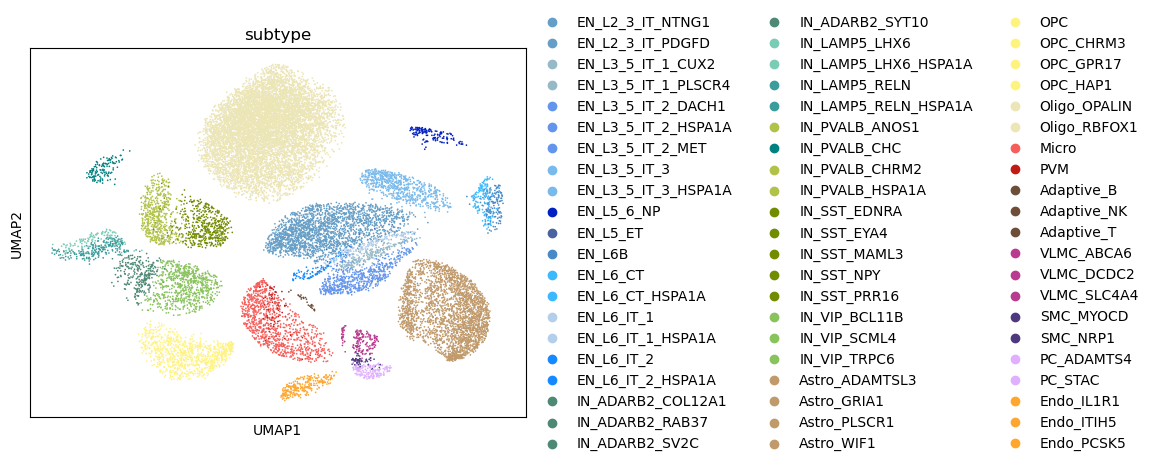

In [32]:
# UMAP

sc.pl.umap(adata_hvg, color="leiden")

sc.pl.umap(adata_hvg, color="class")

sc.pl.umap(adata_hvg, color='cell_type')

sc.pl.umap(adata_hvg, color="disease")
sc.pl.umap(adata_hvg, color="genetic_ancestry")

sc.pl.umap(adata_hvg, color='subtype')

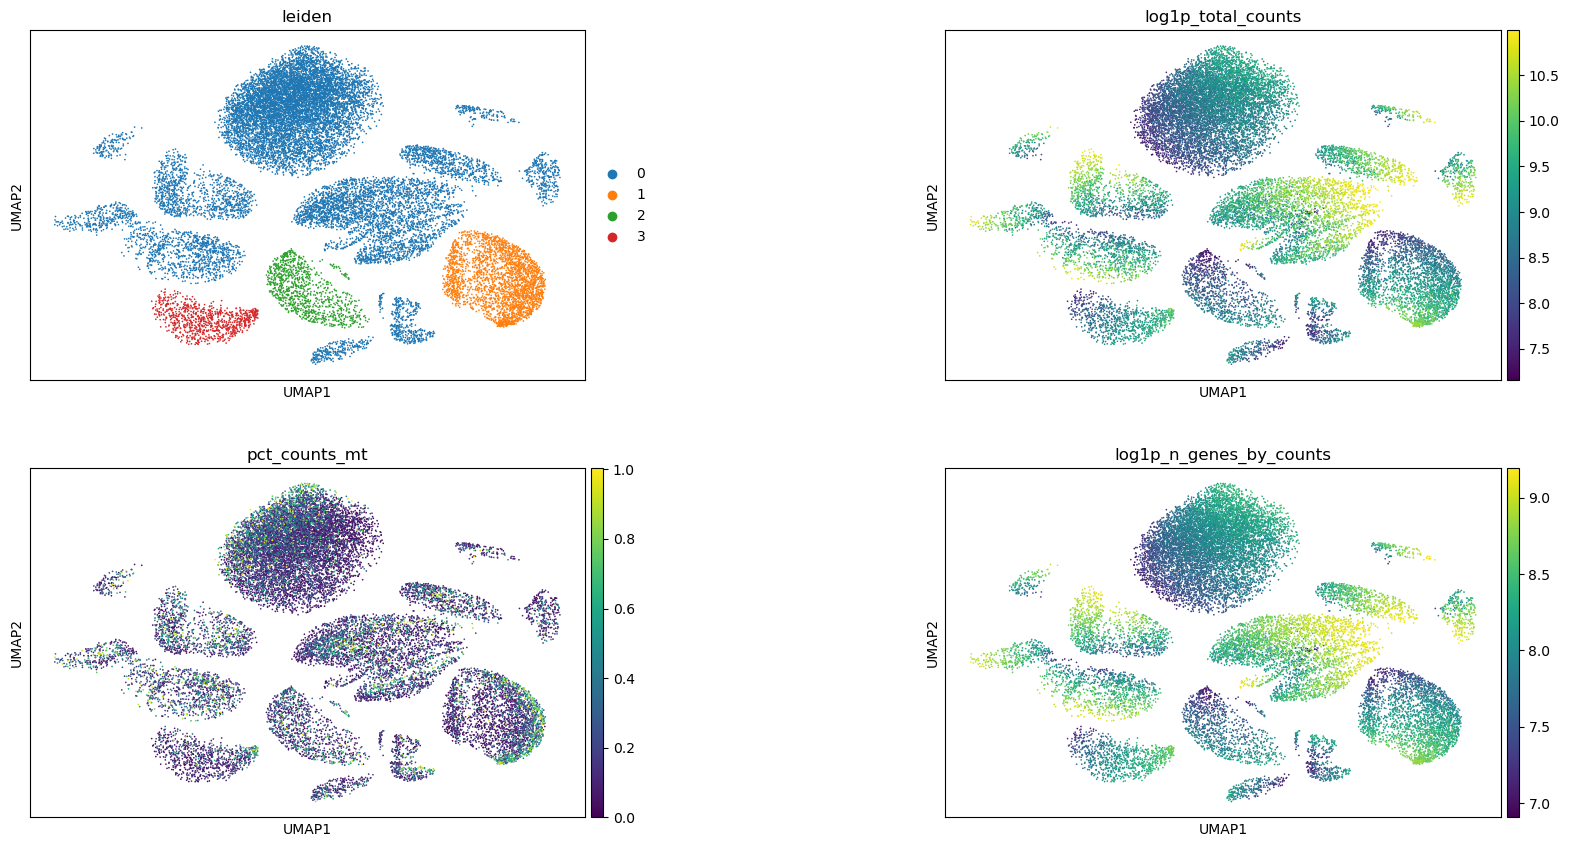

In [33]:
sc.pl.umap(
    adata_hvg,
    color = ["leiden", "log1p_total_counts", "pct_counts_mt", "log1p_n_genes_by_counts"],
    wspace = 0.5,
    ncols = 2,
)

## **6. Annotation**

### Marker gene set
We first define known marker genes of the cell types that we think are represented by the clusters. We only keep the genes in that list that are found in our data.

In [34]:
# Define marker genes for each cell type
marker_genes = {
    "Astro" : ["ENSG00000135821", "ENSG00000125398", "ENSG00000171885", "ENSG00000152661", "ENSG00000165795", "ENSG00000131095", "ENSG00000144908"],
    "Endo" : ["ENSG00000184113", "ENSG00000229515"],
    "Micro" : ["ENSG00000125730", "ENSG00000019582" ,"ENSG00000168329","ENSG00000182578", "ENSG00000173372"],
    "Oligo" : ["ENSG00000197971", "ENSG00000204655", "ENSG00000123560", "ENSG00000168314", "ENSG00000105695"],
    "OPC" : ["ENSG00000184221", "ENSG00000205927", "ENSG00000150275", "ENSG00000134853"],
    "EN" : ["ENSG00000070808", "ENSG00000154146", "ENSG00000119042", "ENSG00000104888"],
    "IN" : ["ENSG00000128683", "ENSG00000136750"],
    "Mural" : ["ENSG00000113721", "ENSG00000175084", "ENSG00000173546"]
    }

marker_genes

# Only keep the marker genes find in our data

marker_genes_in_data = {}
for ct, markers in marker_genes.items():
    markers_found = []
    for marker in markers:
        if marker in adata_hvg.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found

marker_genes_in_data
 

{'Astro': ['ENSG00000171885', 'ENSG00000131095', 'ENSG00000144908'],
 'Endo': ['ENSG00000184113'],
 'Micro': ['ENSG00000125730',
  'ENSG00000019582',
  'ENSG00000168329',
  'ENSG00000182578'],
 'Oligo': [],
 'OPC': [],
 'EN': [],
 'IN': ['ENSG00000136750'],
 'Mural': ['ENSG00000175084']}

Listing cell types we want to show the markers for:

In [37]:
cell_types = ["Astro", "Endo", "Micro", "IN", "Mural"]
cell_types

['Astro', 'Endo', 'Micro', 'IN', 'Mural']

Plotting one UMAP per marker for each cell type:

ASTRO:


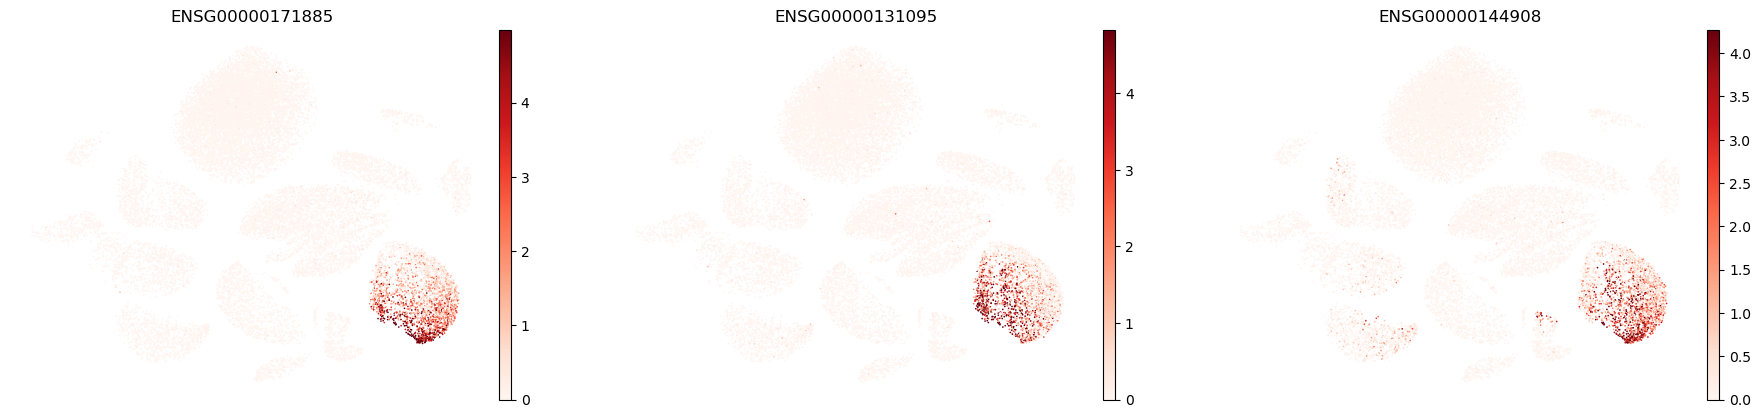





ENDO:


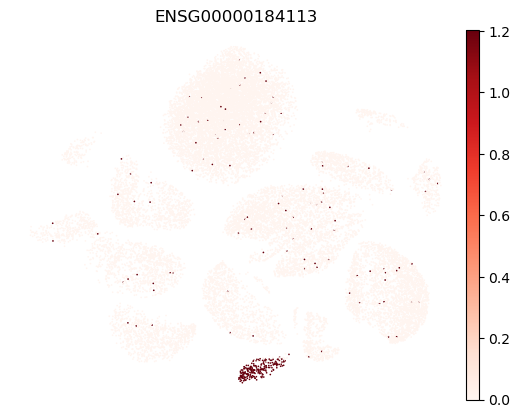





MICRO:


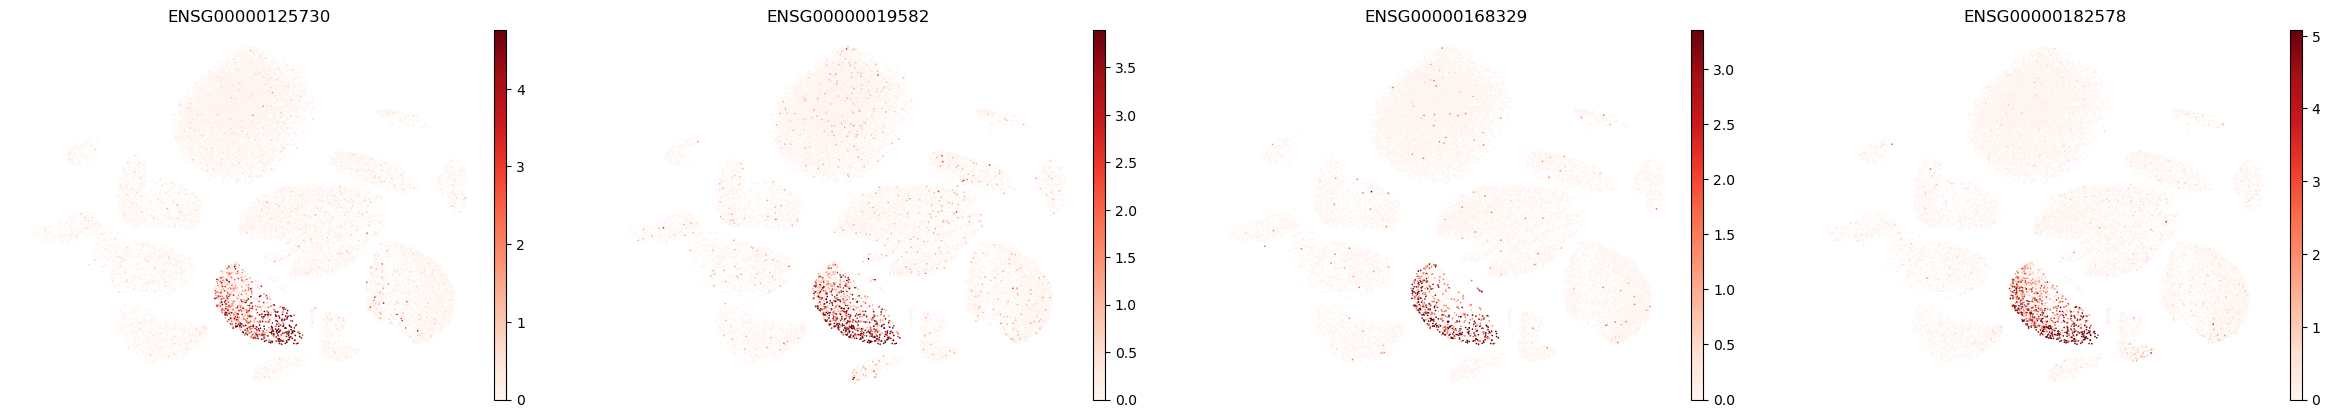





IN:


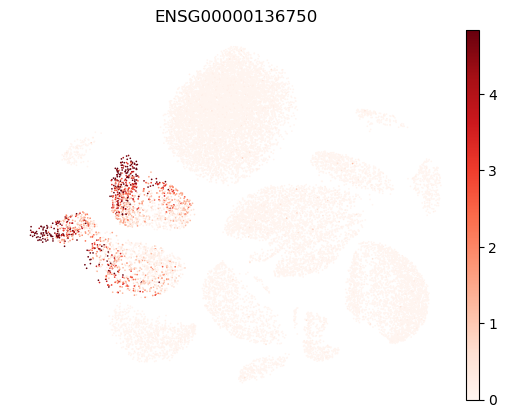





MURAL:


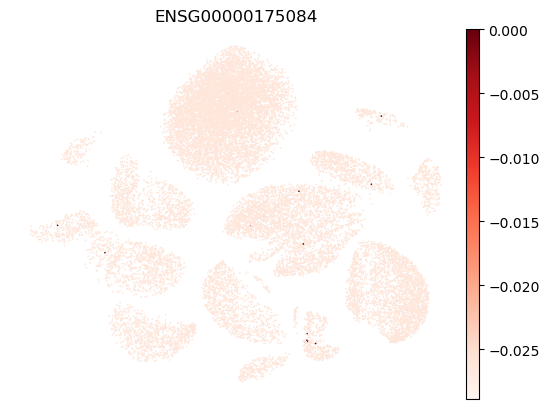

In [38]:
for ct in cell_types:
    print(f"{ct.upper()}:")  # print cell subtype name
    sc.pl.umap(
        adata_hvg,
        color = marker_genes_in_data[ct],
        vmin=0,
        vmax="p99",
        sort_order = False, 
        frameon = False,
        cmap = "Reds", 
    )
    print("\n\n\n")  # print white space for legibility

Dotplot visualization of marker gene expression per cluster:

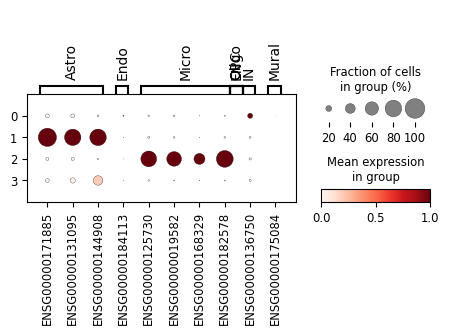

In [39]:
sc.pl.dotplot(
    adata_hvg,
    groupby = "leiden",
    var_names = marker_genes_in_data,
    standard_scale = "var",  # standard scale: normalize each gene to range from 0 to 1
)

Referring to both representations, we can manually annotate the clusters:

In [40]:
cl_annotation = {
    "0": "Oligo",
    "1": "EN",
    "2": "Astro", # and mural? 
    "3": "Micro",
    "4": "IN", 
    "5" : "IN", # need to find distinguishing markers from cluster 4
    "6" : "OPC",
    "7" : "Endo"
}

To visualize the annotations:

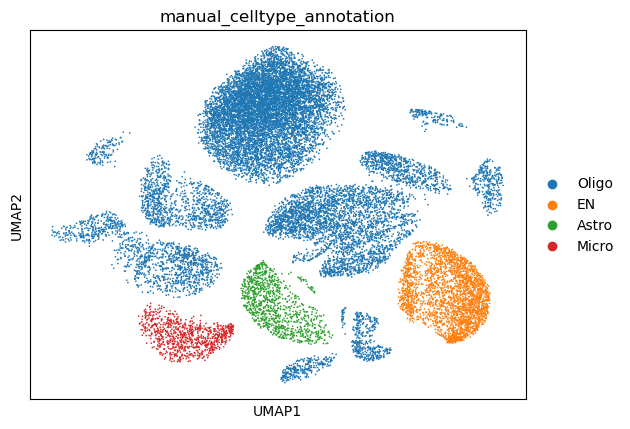

In [41]:
adata_hvg.obs["manual_celltype_annotation"] = adata_hvg.obs.leiden.map(cl_annotation)

sc.pl.umap(adata_hvg, color = ["manual_celltype_annotation"])

To confirm our annotations, we can find the differentially expressed genes for each cluster as compared to the others. We also want to use this to distinguish clusters 4 and 5.

c:\Users\yarad\AppData\Local\spyder-6\envs\spyder-runtime\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\yarad\AppData\Local\spyder-6\envs\spyder-runtime\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\yarad\AppData\Local\spyder-6\envs\spyder-runtime\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\yarad\AppData\Local\spyder-6\envs\spyder-runtime\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


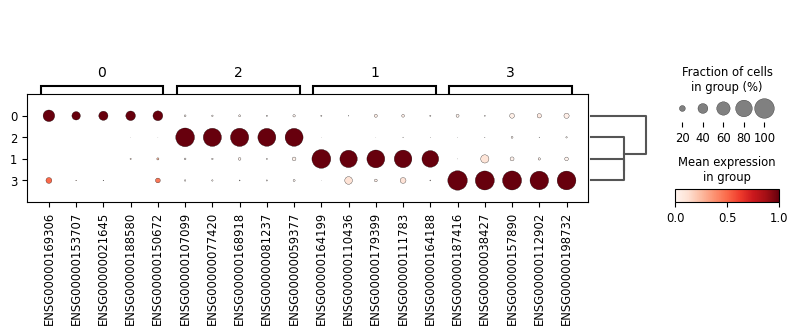

In [43]:
# Calculating differentially expressed genes for each cluster 
    ## We are using the rank_genes_groups function from scanpy for annotations, but for downstream analyses, we will do pseudo-bulk differential expression to avoid pseudoreplication issues

sc.tl.rank_genes_groups(
    adata_hvg, groupby = "leiden", method = "wilcoxon", key_added = "dea_leiden"
)

# Visualizing the expression of the 5 top DE genes per cluster (dotplot representation)
sc.pl.rank_genes_groups_dotplot(
    adata_hvg, groupby = "leiden", standard_scale = "var", n_genes = 5, key = "dea_leiden"
)

## **7. Differential Gene Expression**

In [ ]:
cluster = "0"

adata_cluster = adata_hvg[adata_hvg.obs["leiden"] == cluster]

In [ ]:
sc.tl.rank_genes_groups(
    adata_cluster,
    groupby = "disease",
    groups = ["dementia || Alzheimer disease"],
    reference = "normal",
    method = "wilcoxon"
)

/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:669: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


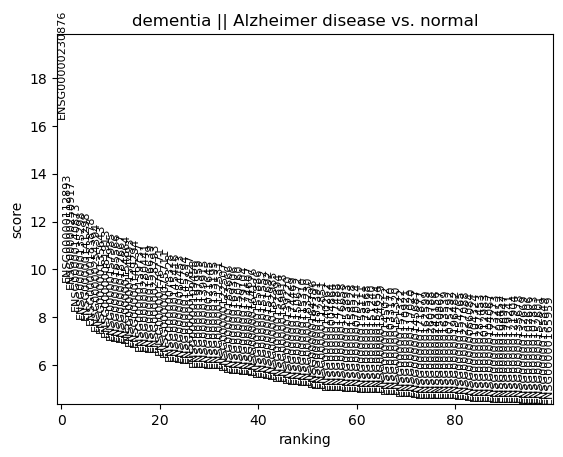

In [ ]:
sc.pl.rank_genes_groups(adata_cluster, n_genes=100)

In [ ]:
## Pseudo-bulk Approach
We must first aggregate per donor

SyntaxError: invalid syntax (3852582754.py, line 2)

In [ ]:
pb = adata.to_df().groupby(adata_hvg.obs["donor_id"]).sum()